In [1]:
import numpy as np
import matplotlib.pyplot as plt

import desdeo_emo
from desdeo_problem.testproblems.DBMOPP.DBMOPP_generator import DBMOPP_generator
from desdeo_problem.testproblems.DBMOPP.Region import AttractorRegion, Attractor, Region
from desdeo_problem.testproblems.DBMOPP.utilities import get_2D_version, euclidean_distance, get_random_angles, between_lines_rooted_at_pivot, assign_design_dimension_projection

In [2]:
plt.rcParams["figure.figsize"] = (10,8)

## Create DBMOPP generator 

#### Parameters:
   - n_objectives is number of the objectives from 2 to 10
   
   
   - n_variables is number of the variables from 2 to 10
   
   
   - n_local_pareto_regions, number of local pareto regions can be 0 or more. Plotted in green.
    
    
   - n_dominance_res_regions, number of dominance regions can be 0 or more. Plotted in blue.
   
    
   - n_global_pareto_regions, number of global pareto regions can be 1 or more. Plotted in red.
    
    
   - const_space is the proportion of constrained 2D space, 1.0 means whole space is constrained, 0.0 means no amount of space is constrained. If set to anything else than 0.0 constraint type must be 4 or 8.
   
    
   - pareto_set_type. A set type for global pareto set. If set to 1, n_global_pareto_regions must be bigger than 1.
        - 0: duplicate performance
        - 1: partially overlapping performance
        - 2: non-intersecting performance
      
      
  - constraint_type. Is the type of constraints applied.
      - 0: no constraints
      - 1-4: Hard vertex, centre, moat, extended checker type.
      - 5-8: Soft vertex, centre, moat, extended checker type.
   
   - prop_neutral (float): Proportion of neutral space. Defaults to 0
    
The following parameters are suggested to be left to their default values since using different combinations of them in DBMOPP_generator has not been tested yet.
 
 
  - ndo (int): number of regions to apply whose cause discontinuities in objective functions. Default 0. 
  
  
  - vary_sol_density (bool): Should solution density vary in maping down to each of the two visualized dimensions.Default to False
  
  
  - vary_objective_scales (bool): Are objective scale varied. Defaults to False
  
   
  - nm (int): Number of samples used for approximation checker and neutral space coverage. Defaults to 10000

## Simple problem

- 3 objectives and 2 variables.
- hard vertex constraints, 2 local pareto regions and 3 global of type 0.

Assigning any checker soft/hard constraint regions and neutral regions

Assigning any vertex soft/hard constraint regions

Assigning any centre soft/hard constraint regions.

Assigning any moat soft/hard constraint regions

n_obj:  4
n_var:  2
n_nlp:  2
n_ndr:  0
n_ngp:  3
potype:  0
const type:  1
None
Initializing works!


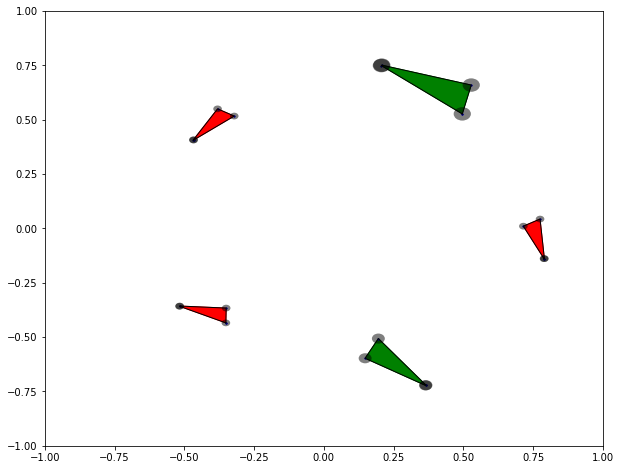

In [3]:
# parameters
n_objectives = 4
n_variables = 2 
n_local_pareto_regions = 2 
n_dominance_res_regions = 0
n_global_pareto_regions = 3 
const_space = 0.0
pareto_set_type = 0 
constraint_type = 1

ndo = 0
vary_sol_density = False
vary_objective_scales = False
prop_neutral = 0
nm = 10000

simple_problem = DBMOPP_generator(
    n_objectives,
    n_variables,
    n_local_pareto_regions,
    n_dominance_res_regions,
    n_global_pareto_regions,
    const_space,
    pareto_set_type,
    constraint_type, 
    ndo, 
    vary_sol_density, 
    vary_objective_scales, 
    prop_neutral, 
    nm
)
print(simple_problem._print_params())

print("Initializing works!")

# Plot the generated problem
simple_problem.plot_problem_instance()

### Plot Pareto set members

Pareto set can be plotted either by using plot_pareto_set_members function or by getting individual Pareto set members and plotting them.

#### Get individual Pareto set member.
This returns random Pareto set member uniformly from the Pareto set and the point in 2D that it maps to. Should not be used during optimisation.

In [4]:
po_member, point_in_2d = simple_problem.get_Pareto_set_member()
print(f"Pareto set member: {po_member} and the point in 2D: {point_in_2d} ")

Pareto set member: [-0.36593252  0.51348124] and the point in 2D: [-0.36593252  0.51348124] 


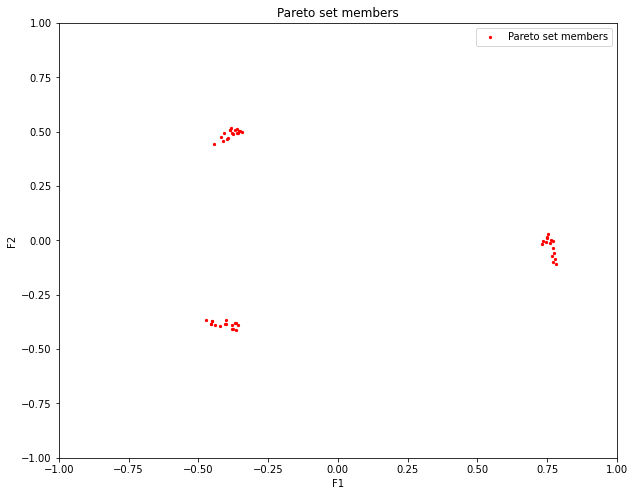

In [5]:
## for example getting 50 points and then plotting them in 2d
n_of_points = 50 
po_list = np.zeros((n_of_points, simple_problem.n))
po_points = np.zeros((n_of_points, 2))

for i in range(n_of_points):
    result = simple_problem.get_Pareto_set_member()
    po_list[i] = result[0]
    po_points[i] = result[1]

plt.scatter(x=po_points[:,0], y=po_points[:,1], s=5, c="r", label="Pareto set members")
plt.title(f"Pareto set members")
plt.xlabel("F1")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.ylabel("F2")
plt.legend()

#### Plotting the set using plot_pareto_set_members

The bigger the resolution the more defined plot we get, and need more time to compute. This one just checks each point if it belongs to Pareto set or not.

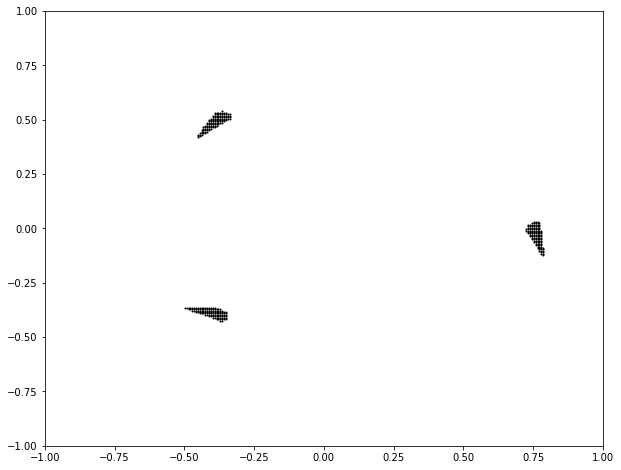

[[-0.49832776 -0.36454849]
 [-0.4916388  -0.36454849]
 [-0.48494983 -0.37123746]
 [-0.48494983 -0.36454849]
 [-0.47826087 -0.37123746]]


In [6]:
resolution = 300
# function returns the plotted dots as a list. If list has too little members, make resolution bigger.
pareto_optimal_set = simple_problem.plot_pareto_set_members(resolution)
print(pareto_optimal_set[:5]) # print first five

### Plot problem landscape in for single objective

One can plot the problem landscape for each of the objectives one by one. White areas are the constrained areas.

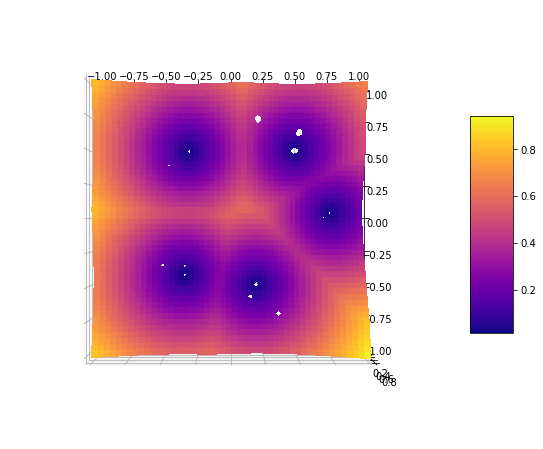

In [7]:
obj = 0 # just pick first objective as an example
resolution = 500
simple_problem.plot_landscape_for_single_objective(obj, resolution)

## More complex problem

- 6 objectives and 10 variables.
- soft extended checker, 3 local pareto regions and 5 global of type 2. 4 dominance resistance regions.
- constraint space is set 0.3, neutral space is set to 0.1.

r2 [3.22201808 2.3288476  2.81217101 2.6895686 ]
[0.42736671 2.3288476  2.6895686  2.81217101 3.22201808 4.48160322]
[4.48160322]
[0.42736671]
Assigning any checker soft/hard constraint regions and neutral regions

Assigning any vertex soft/hard constraint regions

Assigning any centre soft/hard constraint regions.

Assigning any moat soft/hard constraint regions

Initializing works!


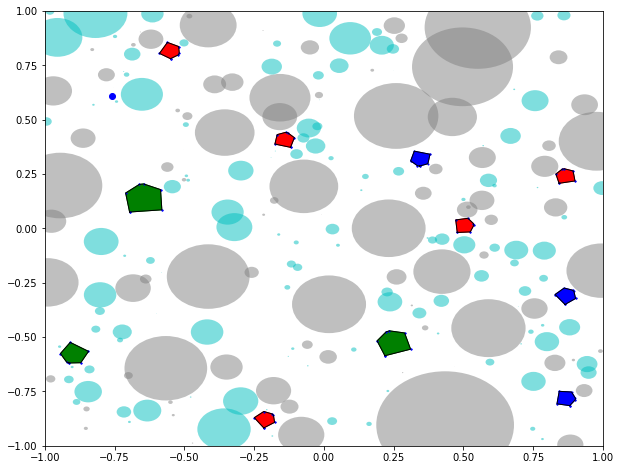

In [8]:
# parameters
n_objectives = 6
n_variables = 10 
n_local_pareto_regions = 3 
n_dominance_res_regions = 4
n_global_pareto_regions = 5 
const_space = 0.3
pareto_set_type = 2 
constraint_type = 8 

ndo = 0
vary_sol_density = False
vary_objective_scales = False
prop_neutral = 0.1
nm = 10000

complex_problem = DBMOPP_generator(
    n_objectives,
    n_variables,
    n_local_pareto_regions,
    n_dominance_res_regions,
    n_global_pareto_regions,
    const_space,
    pareto_set_type,
    constraint_type, 
    ndo, 
    vary_sol_density, 
    vary_objective_scales, 
    prop_neutral, 
    nm
)
#print(complex_problem._print_params())

print("Initializing works!")

# Plot the generated problem
complex_problem.plot_problem_instance()

### Generate DESDEO's MOProblem

In [9]:
# use DBMOPP_generators generate problem
moproblem = simple_problem.generate_problem()
#moproblem = complex_problem.generate_problem()

Generating MOProblem


You can evaluate certain set of decision vectors with the generated MOproblem.

In [10]:
import random

n_of_variables = simple_problem.n
x = np.array(np.random.rand(5, n_of_variables))
evaluation_result = moproblem.evaluate(x)
print(evaluation_result)

Evaluation Results Object 
Objective values are: 
[[0.23509717 0.57607964 0.2919177  0.57619544]
 [0.15009743 0.32022662 0.20998894 0.31996167]
 [0.21107733 0.16269447 0.22304578 0.16218633]
 [0.2105355  0.48660392 0.15372866 0.48768974]
 [0.2957884  0.3485578  0.39512771 0.34672624]]
Constraint violation values are: 
[[0.20420543 0.56513265 0.26102596 0.56546178 1.0476866  1.18165928
  1.14986458 1.18015691 1.35533798 1.44384275 1.31250138 1.44492785
  1.02055619 1.16359635 1.08300323 1.16290102 0.37848164 0.56063377
  0.40604472 0.56074957]
 [0.46222615 0.82565522 0.54549492 0.82555704 0.91847717 0.99513278
  1.01716963 0.99343642 1.32631137 1.44538095 1.29573561 1.44632125
  1.19785501 1.31565416 1.26439791 1.31476932 0.13465156 0.30478075
  0.19454307 0.3045158 ]
 [0.18018559 0.13180273 0.19215404 0.13129459 1.11192173 1.32291504
  1.20730821 1.32186802 1.23058454 1.26525538 1.17274776 1.26647887
  0.6229212  0.78966183 0.67748513 0.78924738 0.72883234 0.8854988
  0.71992013 0.8861

Solving the simple problem for example using IBEA.

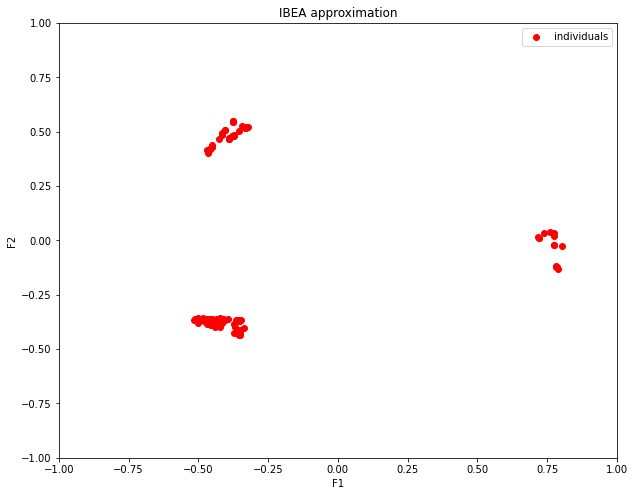

In [11]:
from desdeo_emo.EAs.IBEA import IBEA
ib = IBEA(moproblem, population_size=100, n_iterations=1, n_gen_per_iter=100,total_function_evaluations=5000)
while ib.continue_evolution():
    ib.iterate()
individuals, objective_values = ib.end()

plt.scatter(x=individuals[:,0], y=individuals[:,1], c="r", label="individuals")
plt.title(f"IBEA approximation")
plt.xlabel("F1")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.ylabel("F2")
plt.legend()
plt.show()